[*********************100%%**********************]  1 of 1 completed


Loading BZ=F data from data/2024-12-06/BZ=F.csv
Loading CL=F data from data/2024-12-06/CL=F.csv
Error downloading SPY: 'SPY'
Data for SPY is invalid or missing 'Adj Close', skipping.
Failed to download data for: SPY


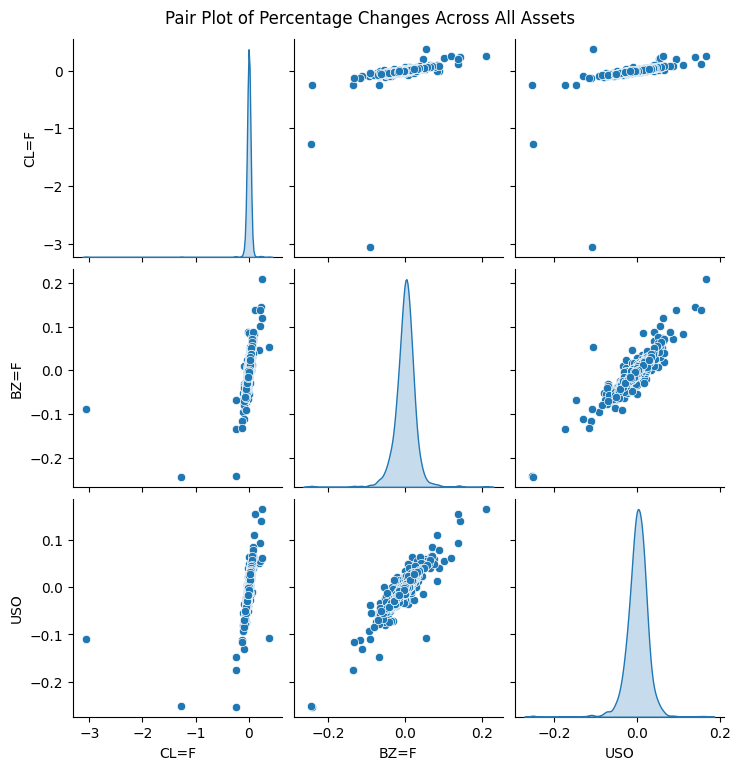

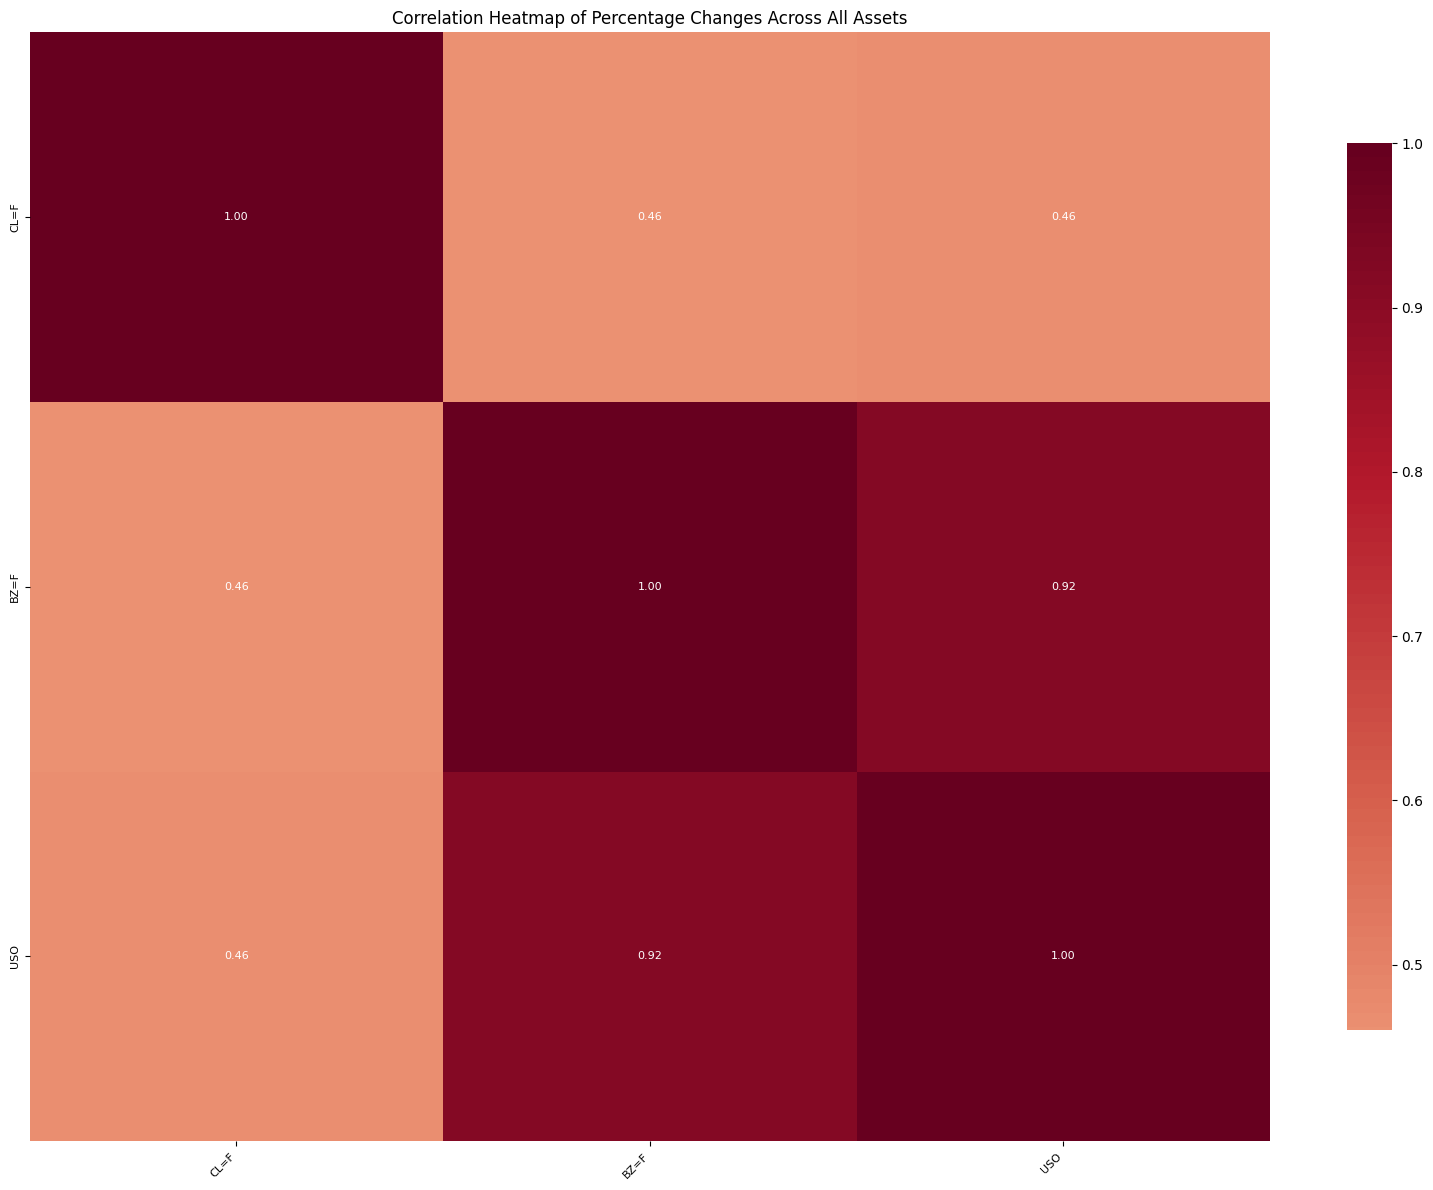

<Figure size 640x480 with 0 Axes>

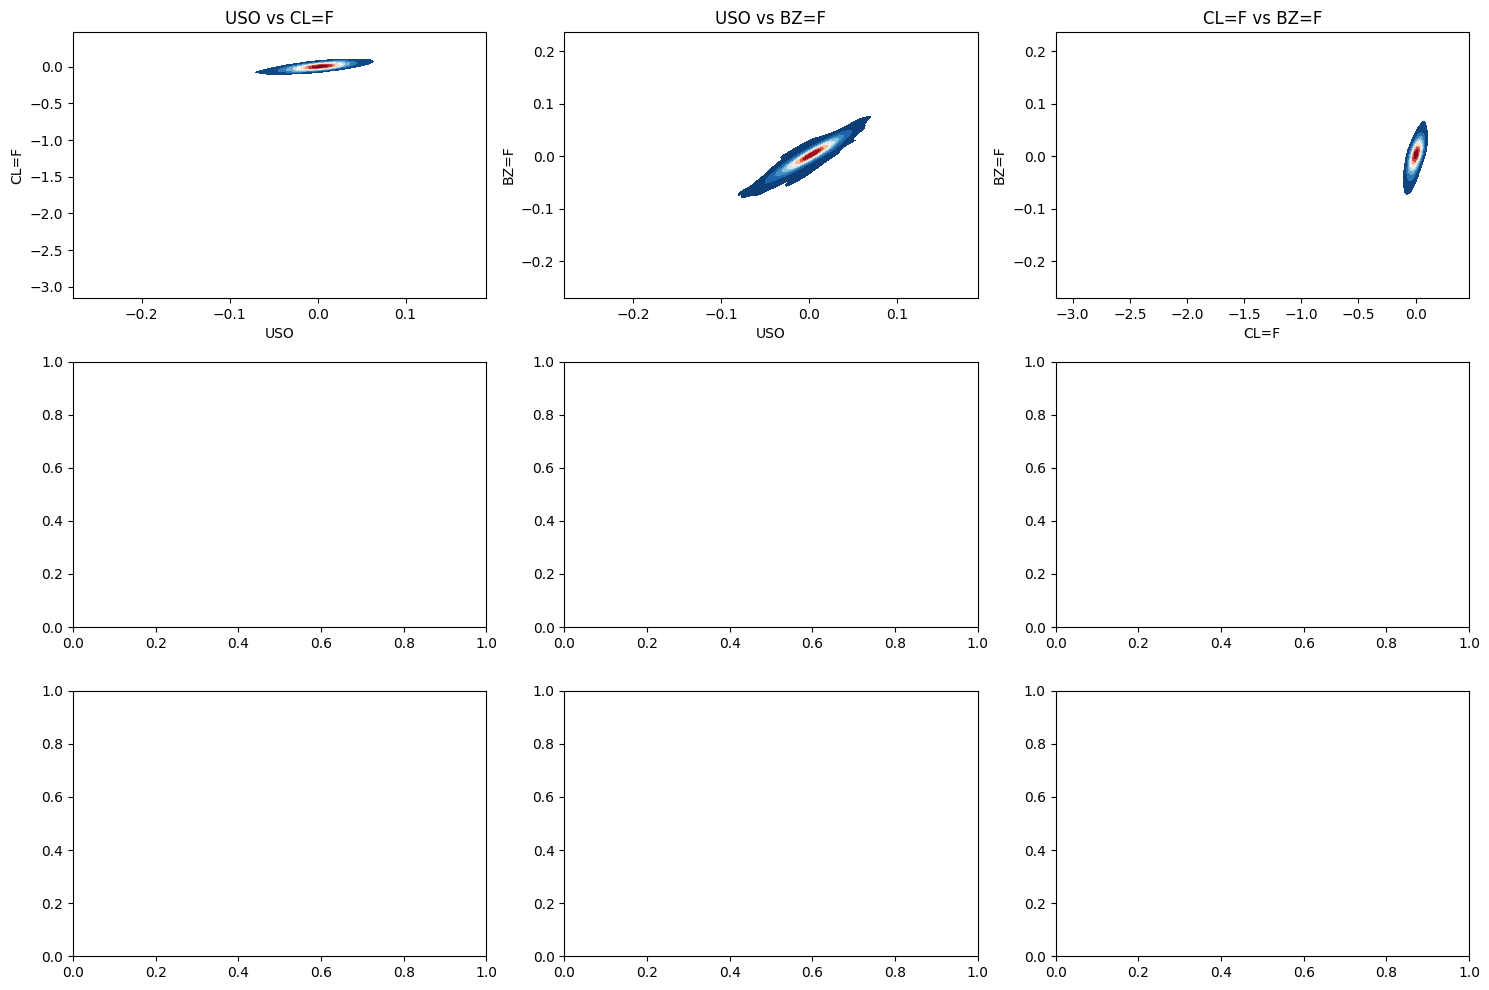

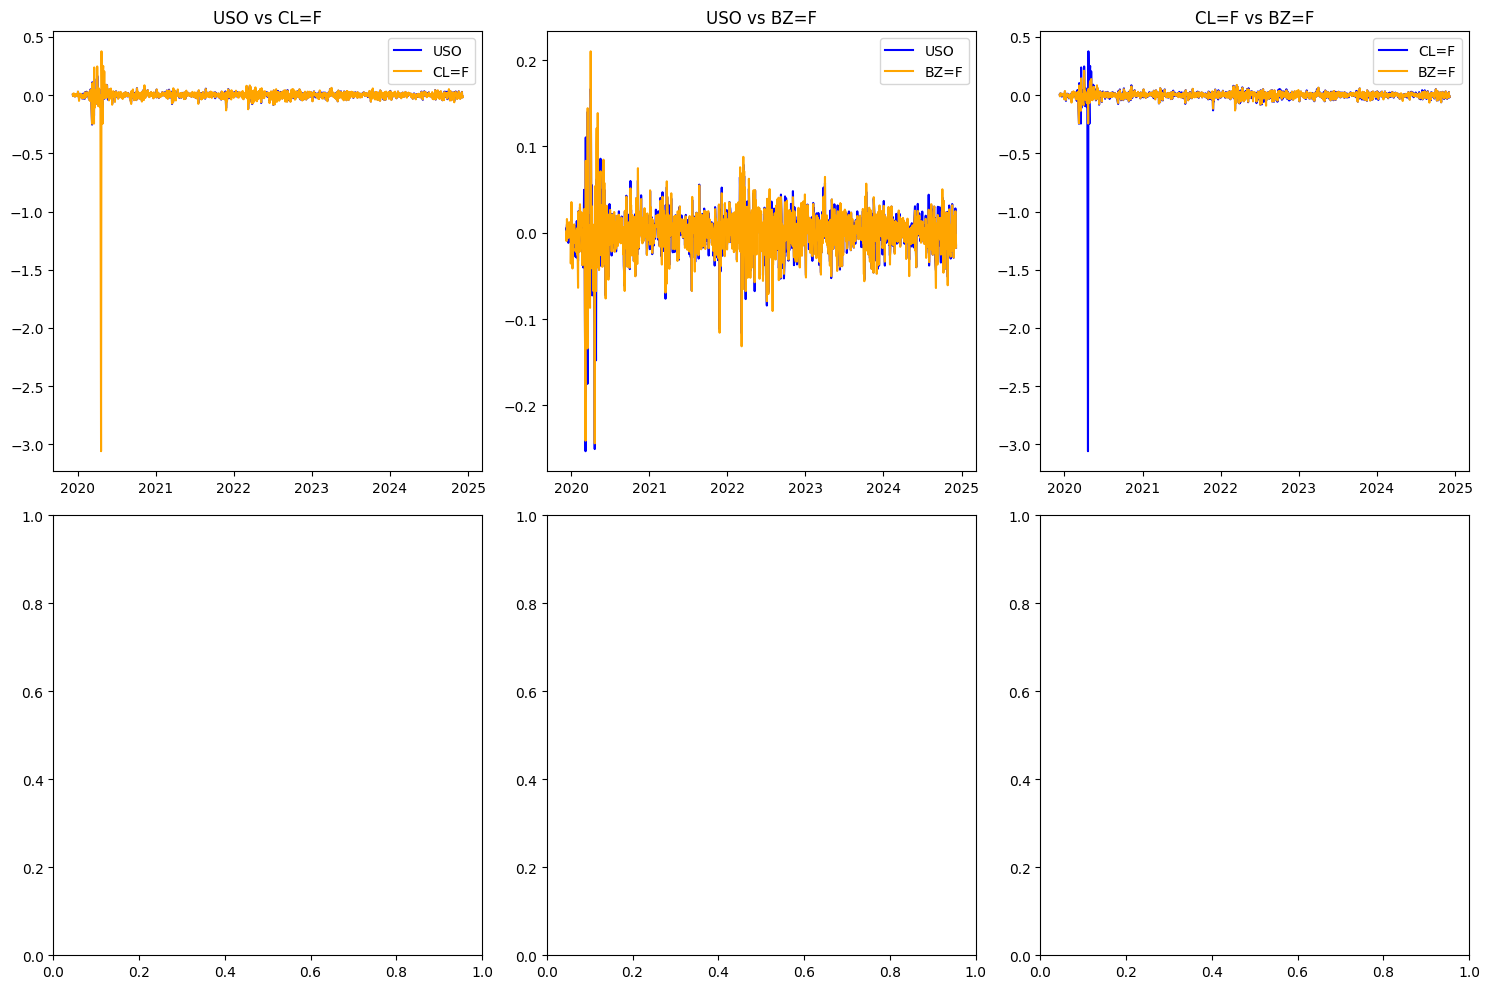

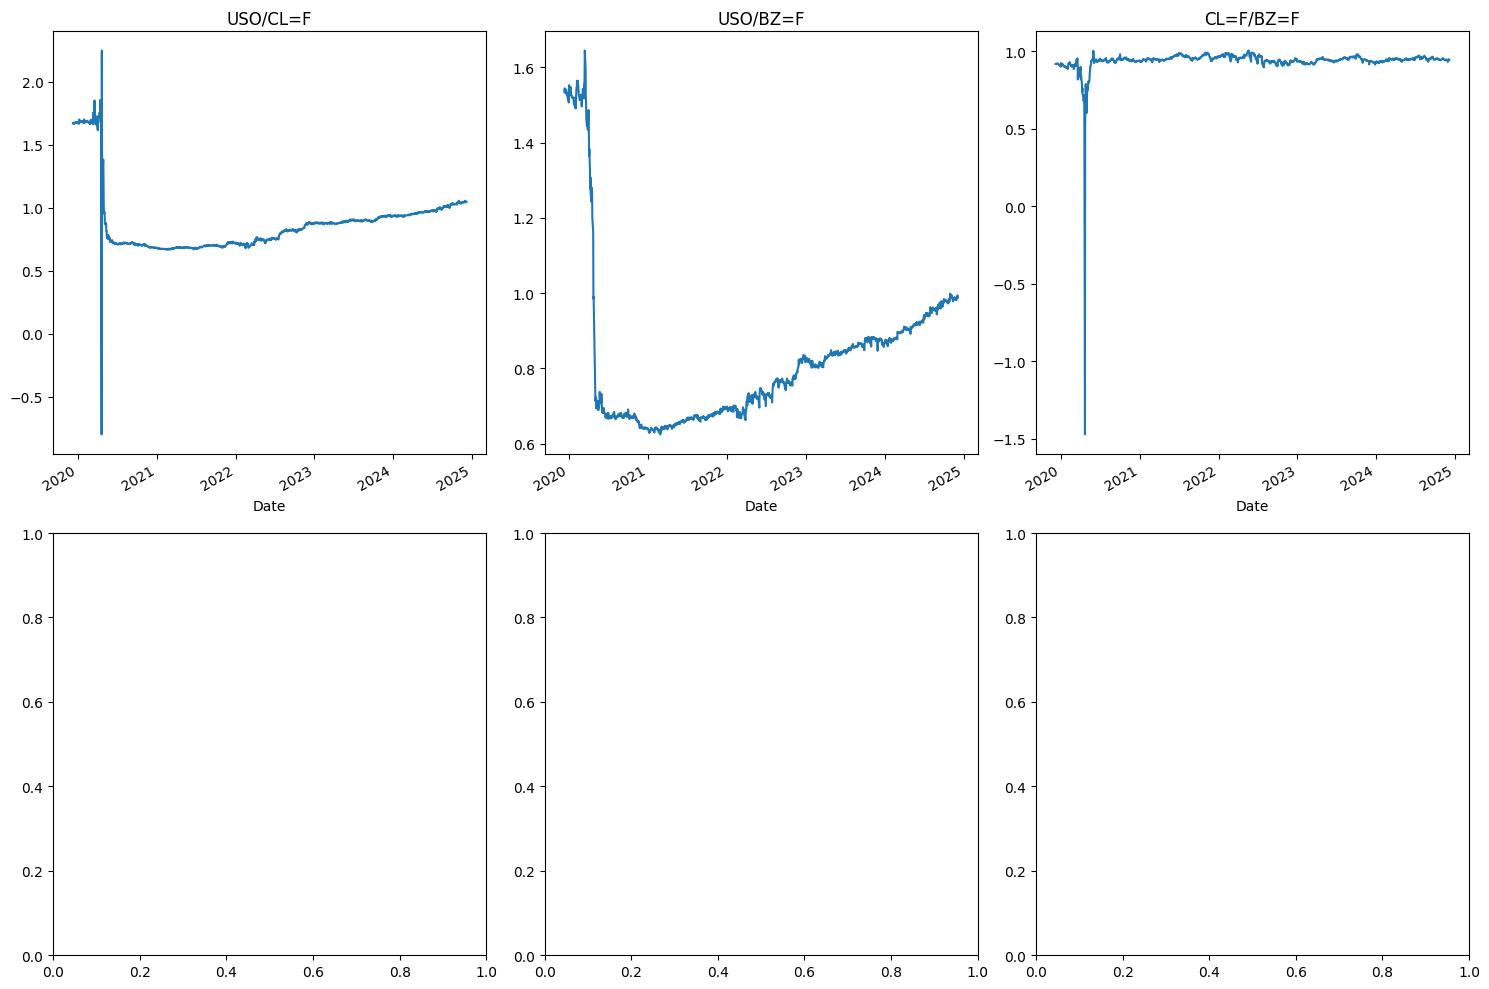

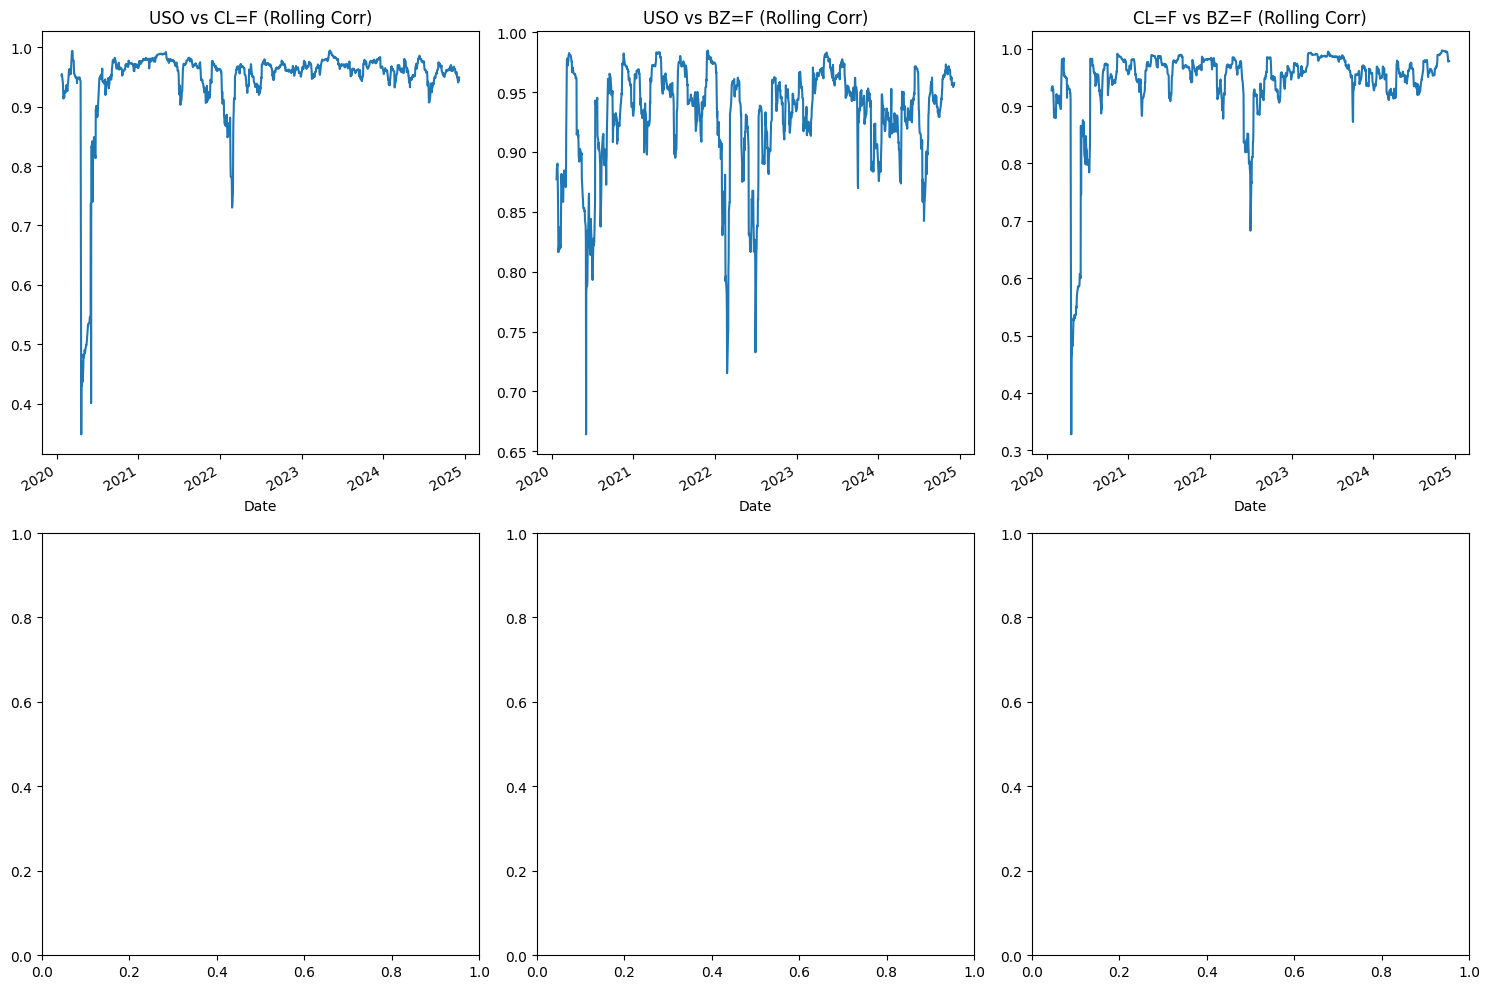

Simulated Volume of Trade: 0


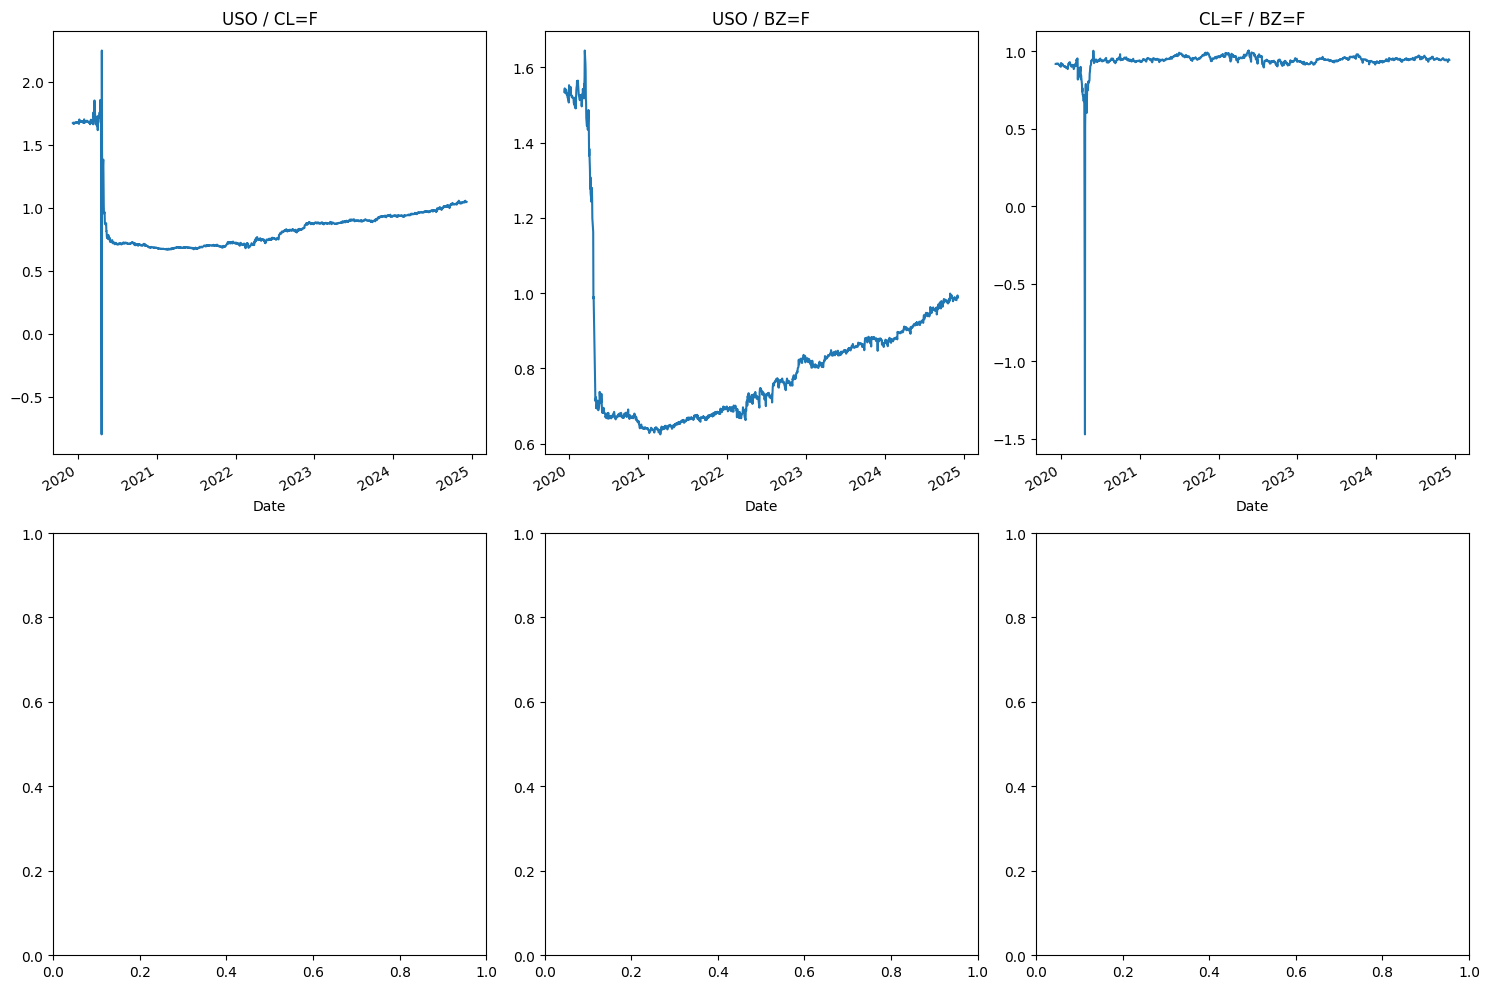

In [2]:
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed

# Create a folder for today's date
today = datetime.today().strftime('%Y-%m-%d')
data_folder = f"data/{today}"
output_folder = f"output/{today}"
os.makedirs(data_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

# Function to download or load cached data
def get_data(ticker):
    file_path = f"{data_folder}/{ticker}.csv"
    
    # Check if file already exists
    if os.path.exists(file_path):
        print(f"Loading {ticker} data from {file_path}")
        try:
            return pd.read_csv(file_path, index_col=0, parse_dates=True)
        except Exception as e:
            print(f"Error loading cached file for {ticker}: {e}")
            return None
    else:
        print(f"Downloading {ticker} data and saving to {file_path}")
        try:
            df = yf.download(ticker, period='5y')
            if not df.empty:
                df.to_csv(file_path)
                return df
            else:
                print(f"Downloaded data for {ticker} is empty, skipping.")
                return None
        except Exception as e:
            print(f"Error downloading {ticker}: {e}")
            return None

# List of ETFs and Commodities
assets = ['SPY', 'USO']
'''
    'IWM', 'SHY', 'TIP', 'IEI', 'DBB', 'DBC', 'GC=F', 'TLT', 'XLU', 'XLK', 'XLY', 'DBC', 'EEM', 'ZROZ', 
    'IEF', 'XLP', 'XLRE', 'PDBC', 'GSG', 'DBA', 'JJM', 'COPX', 'TIP', 'UUP', 
    'ITB', 'EFA', 'VWO', 'XLC', 'XLV', 'XLF', 'XLI', 'XLB', 'XLE', 'XLRE', 
    'XLP', 'XLY', 'XLK', 'XLU', 'FXE', 'FXY', 'FXB', 'FXC', 'FXA', 'FXF', 'CNY'
]
'''

commodities = [
    'CL=F', 'BZ=F']
'''
    'NG=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'HG=F', 
    'PL=F', 'PA=F', 'ALI=F', 'ZC=F', 'ZW=F', 'ZS=F', 'KC=F', 'SB=F', 
    'CT=F', 'CC=F', 'LB=F', 'LE=F', 'HE=F', 'GF=F'
]
'''
'''
# List of ETFs and Commodities
assets = [
    'SPY', 'USO', 'GC=F', 'TLT', 'XLU', 'XLK', 'XLY', 'DBC', 'EEM', 'ZROZ', 
    'IEF', 'XLP', 'XLRE', 'PDBC', 'GSG', 'DBA', 'JJM', 'COPX', 'TIP', 'UUP', 
    'ITB', 'EFA', 'VWO', 'XLC', 'XLV', 'XLF', 'XLI', 'XLB', 'XLE', 'XLRE', 
    'XLP', 'XLY', 'XLK', 'XLU', 'FXE', 'FXY', 'FXB', 'FXC', 'FXA', 'FXF', 'CNY'
]

commodities = [
    'CL=F', 'BZ=F', 'NG=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'HG=F', 
    'PL=F', 'PA=F', 'ALI=F', 'ZC=F', 'ZW=F', 'ZS=F', 'KC=F', 'SB=F', 
    'CT=F', 'CC=F', 'LB=F', 'LE=F', 'HE=F', 'GF=F'
]

all_assets = [ "ALI=F", "BZ=F", "CC=F", "CL=F", "CNY", "COPX", "CT=F", "DBA", "DBB", "DBC", "EEM", "EFA", "FXA", "FXB",
"FXC", "FXE", "FXF", "FXY", "GC=F", "GF=F", "GSG", "HE=F", "HG=F", "HO=F", "IEF", "IEI", "ITB", "IWM", "JJM", "KC=F", 
"LB=F", "LE=F", "NG=F", "PA=F", "PDBC", "PL=F", "RB=F", "SB=F", "SHY", "SI=F", "SPY", "TIP", "TLT", "USO", "UUP", "VWO",
"XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY", "ZC=F", "ZROZ", "ZS=F", "ZW=F" ]
'''


# Combine assets and commodities
all_assets = assets + commodities

# Function to download or load data for all assets in parallel
def download_data_parallel(assets):
    df_dict = {}
    failed_tickers = []
    with ThreadPoolExecutor(max_workers=32) as executor:
        future_to_ticker = {executor.submit(get_data, asset): asset for asset in assets}
        for future in as_completed(future_to_ticker):
            asset = future_to_ticker[future]
            try:
                df = future.result()
                if df is not None and 'Adj Close' in df.columns:
                    df_dict[asset] = df['Adj Close']
                else:
                    print(f"Data for {asset} is invalid or missing 'Adj Close', skipping.")
                    failed_tickers.append(asset)
            except Exception as e:
                print(f"Error processing {asset}: {e}")
                failed_tickers.append(asset)
    if failed_tickers:
        print(f"Failed to download data for: {', '.join(failed_tickers)}")
    return df_dict

df_dict = download_data_parallel(all_assets)

# Ensure we have valid data before continuing
if len(df_dict) == 0:
    print("No valid data was downloaded, exiting...")
else:
    # Calculate percentage change for all assets
    pct_change_dict = {}
    for asset, df in df_dict.items():
        if not df.empty:
            pct_change = df.pct_change().dropna()
            if not pct_change.empty:
                pct_change_dict[asset] = pct_change

    # Convert to DataFrame for easier handling
    combined_pct_change_df = pd.DataFrame(pct_change_dict).dropna()

    # Check if the combined DataFrame is still valid
    if combined_pct_change_df.empty:
        print("No valid percentage change data, exiting...")
    else:
        # === Original Plots === #

        # 1. Pair Plot with KDE for all percentage changes across assets
        g = sns.pairplot(combined_pct_change_df, diag_kind='kde')
        g.fig.suptitle('Pair Plot of Percentage Changes Across All Assets', y=1.02)
        plt.show()
        # Save the pair plot
        g.fig.savefig(f"{output_folder}/pair_plot_percentage_changes.png")

        # 2. Correlation Heatmap for all assets with better label formatting
        def plot_correlation_heatmap(combined_pct_change_df):
            corr_matrix = combined_pct_change_df.corr()

            plt.figure(figsize=(16, 12))
            sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
                        annot_kws={"size": 8}, fmt='.2f', cbar_kws={"shrink": 0.8})
            plt.xticks(rotation=45, ha="right", fontsize=8)
            plt.yticks(fontsize=8)
            plt.title('Correlation Heatmap of Percentage Changes Across All Assets')
            plt.tight_layout()
            plt.show()
            # Save the correlation heatmap
            plt.savefig(f"{output_folder}/correlation_heatmap.png")

        plot_correlation_heatmap(combined_pct_change_df)

        # 3. Joint Plot Grid for kernel density and scatter
        def plot_joint_kde_grid(combined_pct_change_df, assets, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            num_rows = (num_plots // num_cols) + 1

            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
            axes = axes.flatten()

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        sns.kdeplot(x=combined_pct_change_df[asset1], y=combined_pct_change_df[asset2],
                                    cmap="RdBu_r", ax=axes[plot_idx], fill=True)
                        axes[plot_idx].set_title(f'{asset1} vs {asset2}')
                        plot_idx += 1

                        if plot_idx >= len(axes):
                            break
                if plot_idx >= len(axes):
                    break

            plt.tight_layout()
            plt.show()

        plot_joint_kde_grid(combined_pct_change_df, all_assets)

        # === Additional Grids (Displayed and Saved) === #

        # Helper function to create grid layouts with manageable number of subplots
        def create_grid(num_plots, num_cols=3):
            num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
            axes = axes.flatten()
            return fig, axes

        # 1. Time Series Overlay for each pair of assets (in a grid, displayed and saved as PNG)
        def plot_time_series_grid(combined_pct_change_df, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        axes[plot_idx].plot(combined_pct_change_df.index, combined_pct_change_df[asset1], label=f'{asset1}', color='blue')
                        axes[plot_idx].plot(combined_pct_change_df.index, combined_pct_change_df[asset2], label=f'{asset2}', color='orange')
                        axes[plot_idx].set_title(f'{asset1} vs {asset2}')
                        axes[plot_idx].legend()
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_time_series_grid(combined_pct_change_df, all_assets, "time_series_grid")

        # 2. Ratio Analysis (showing each asset relative to others, in a grid, displayed and saved as PNG)
        def plot_ratio_grid(df_dict, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i,asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in df_dict and asset2 in df_dict:
                        ratio = df_dict[asset1] / df_dict[asset2]
                        ratio.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1}/{asset2}')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_ratio_grid(df_dict, all_assets, "ratio_grid")

        # 3. Rolling Correlation Plot for each pair of assets (in a grid, displayed and saved as PNG)
        def plot_rolling_corr_grid(combined_pct_change_df, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        rolling_corr = combined_pct_change_df[asset1].rolling(window=30).corr(combined_pct_change_df[asset2])
                        rolling_corr.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1} vs {asset2} (Rolling Corr)')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_rolling_corr_grid(combined_pct_change_df, all_assets, "rolling_corr_grid")

        # 4. Simulated Volume of Trade (Static value)
        volume_of_trade = 1000000 * len(df_dict.get('SPY', []))
        print(f"Simulated Volume of Trade: {volume_of_trade}")

        # 5. Ratio Comparisons (e.g., SPY / USO) Plots in Grids
        def plot_ratio_comparisons_grid(df_dict, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in df_dict and asset2 in df_dict:
                        ratio = df_dict[asset1] / df_dict[asset2]
                        ratio.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1} / {asset2}')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_ratio_comparisons_grid(df_dict, all_assets, "ratio_comparisons_grid")

Loading SPY data from data/2024-11-24/SPY.csv
Loading USO data from data/2024-11-24/USO.csv
Loading CL=F data from data/2024-11-24/CL=F.csv
Loading BZ=F data from data/2024-11-24/BZ=F.csv


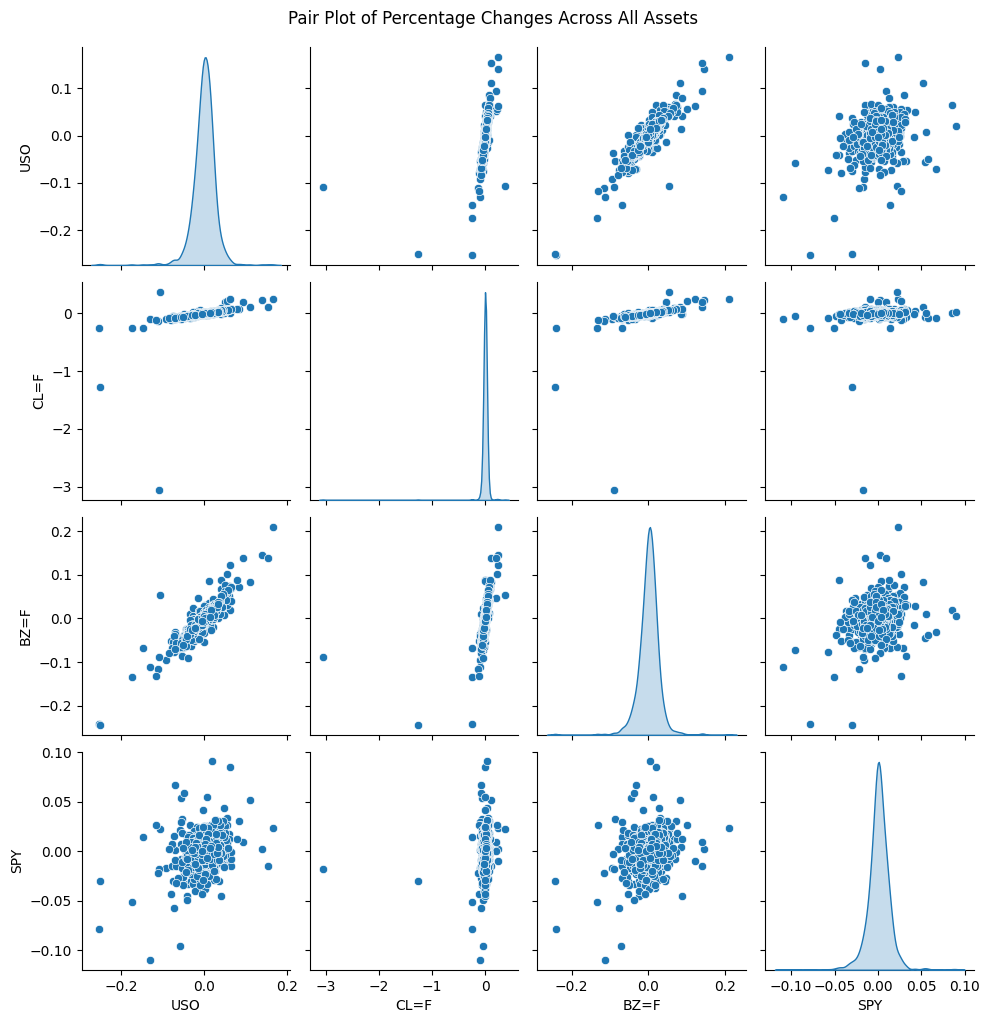

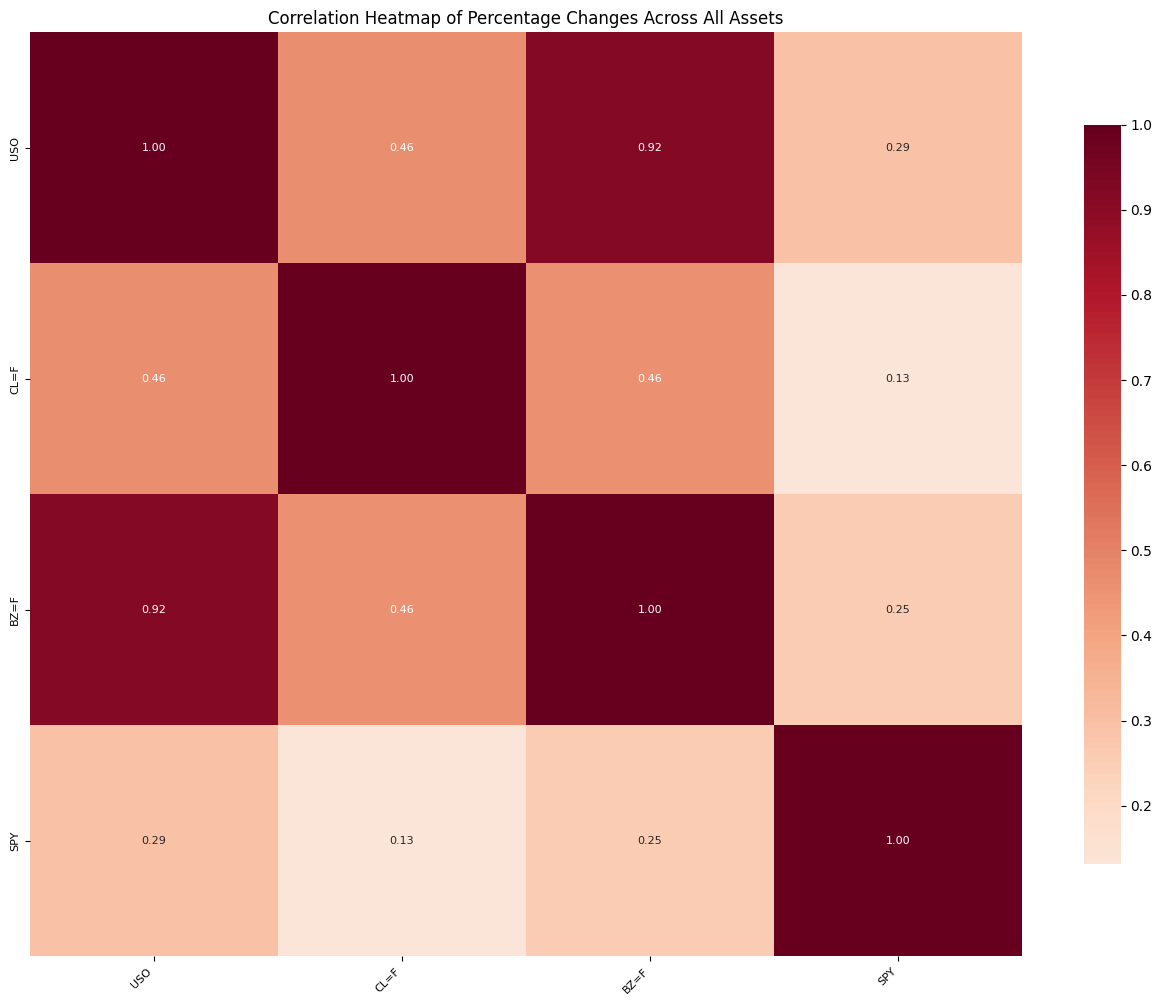

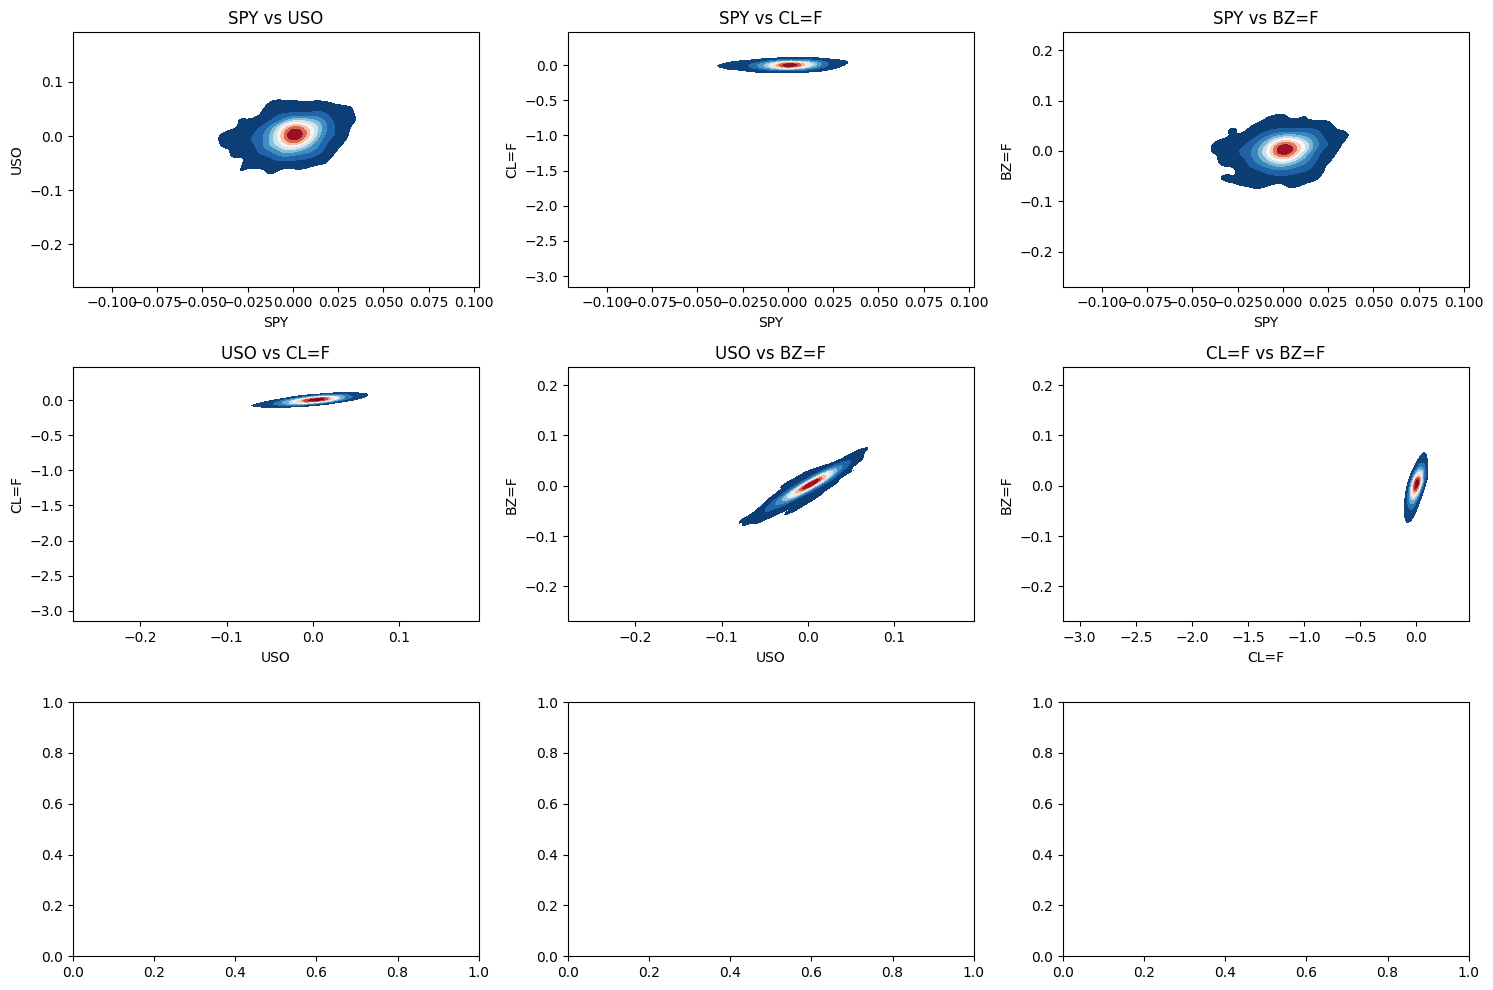

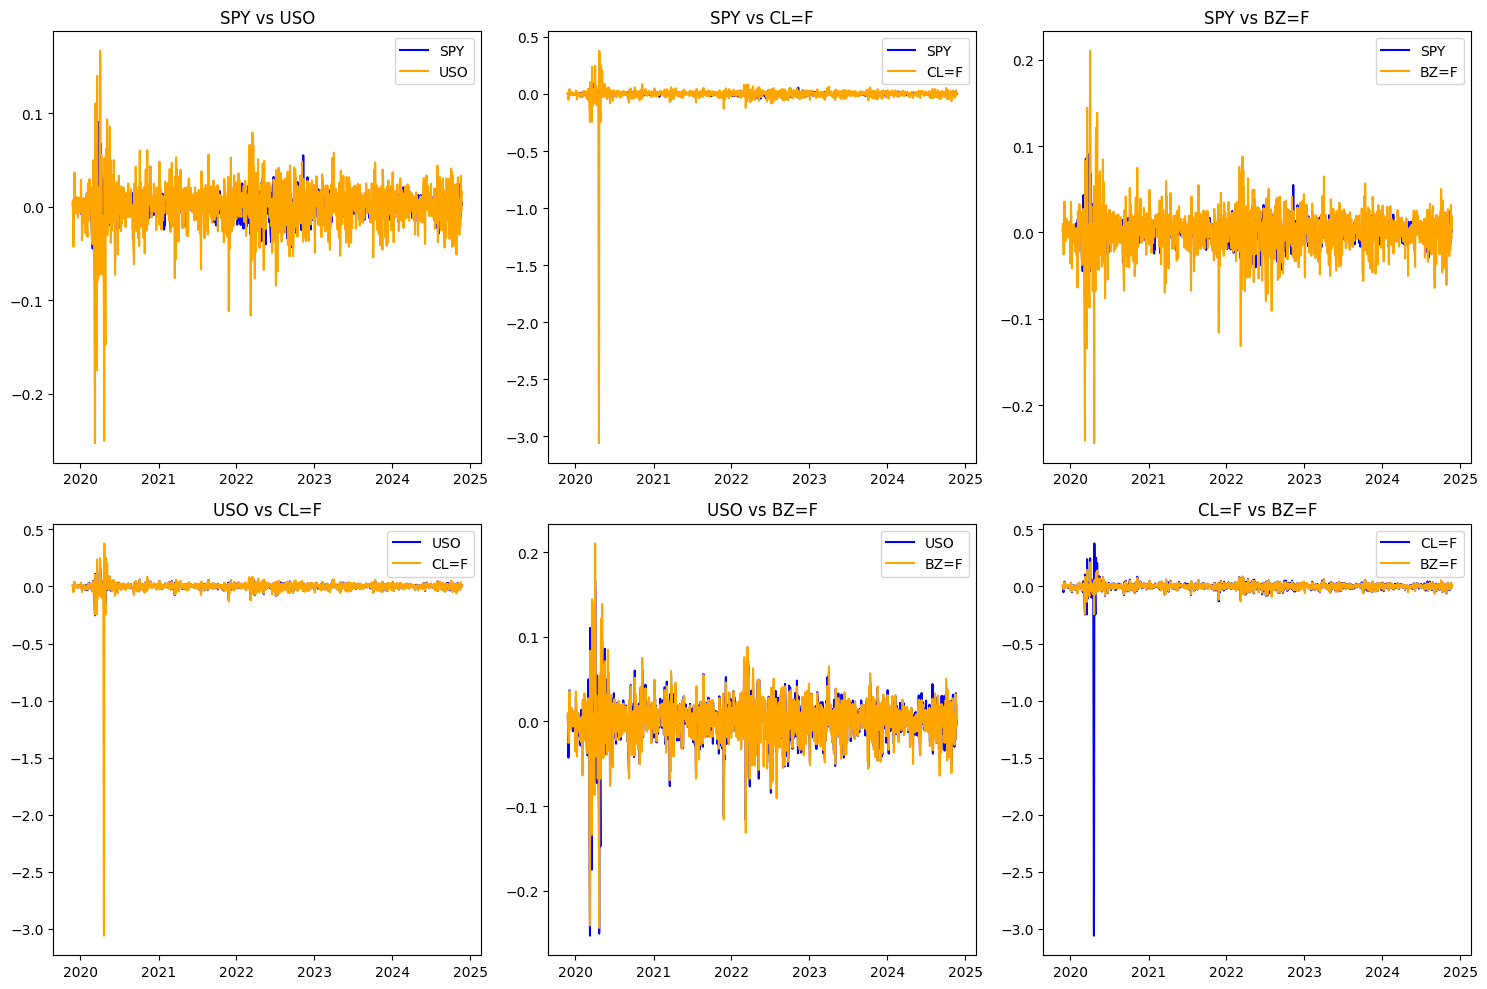

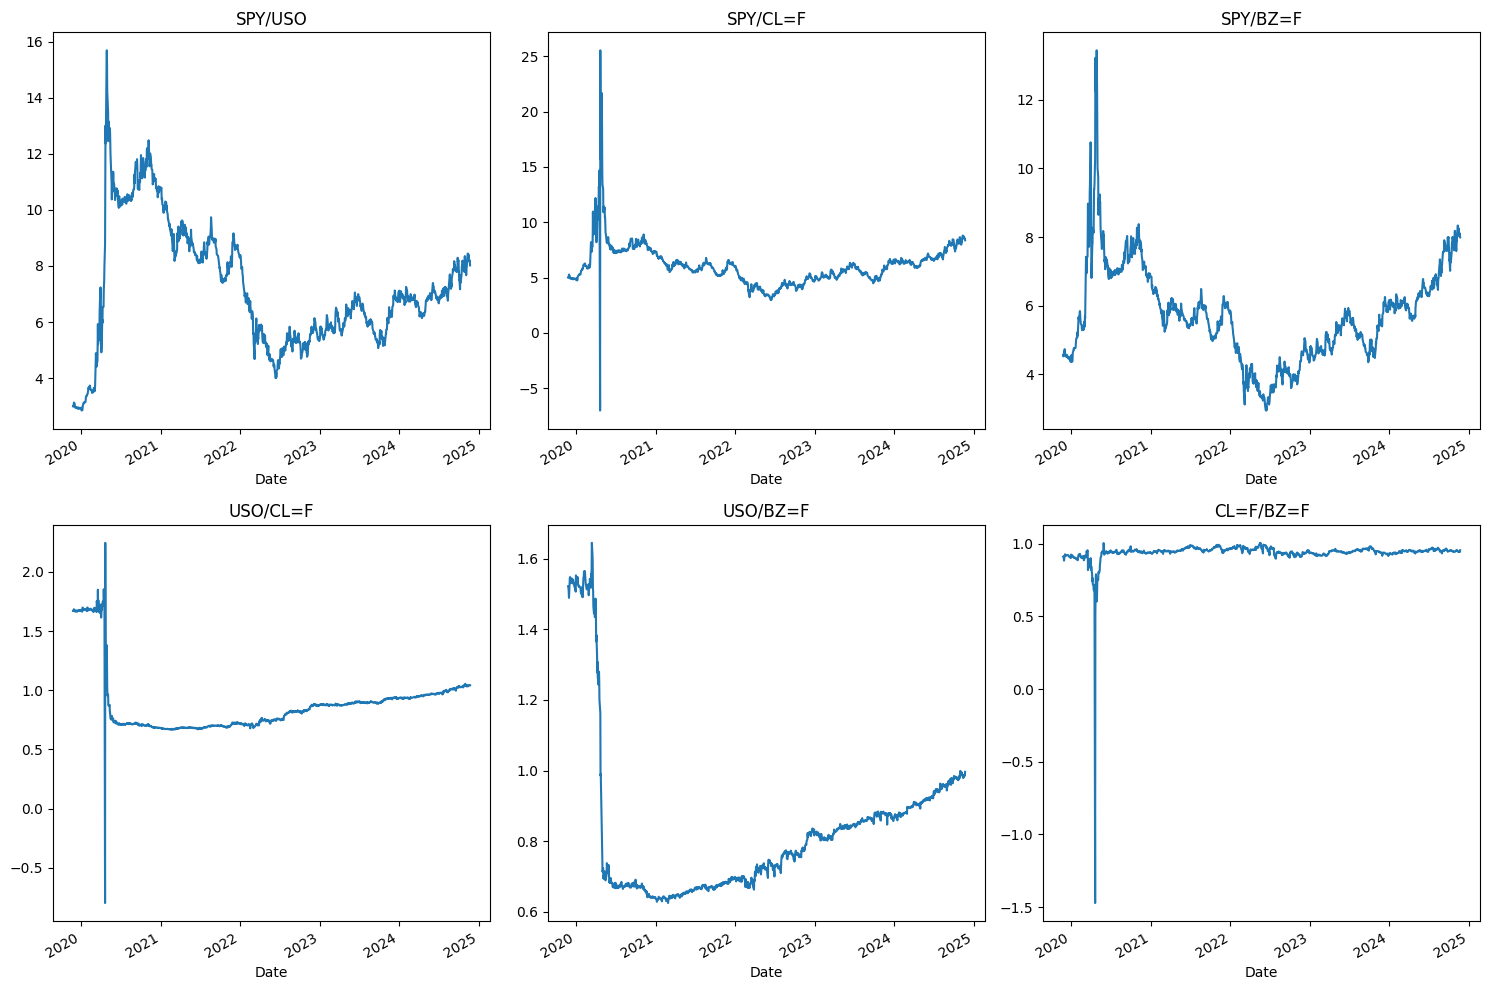

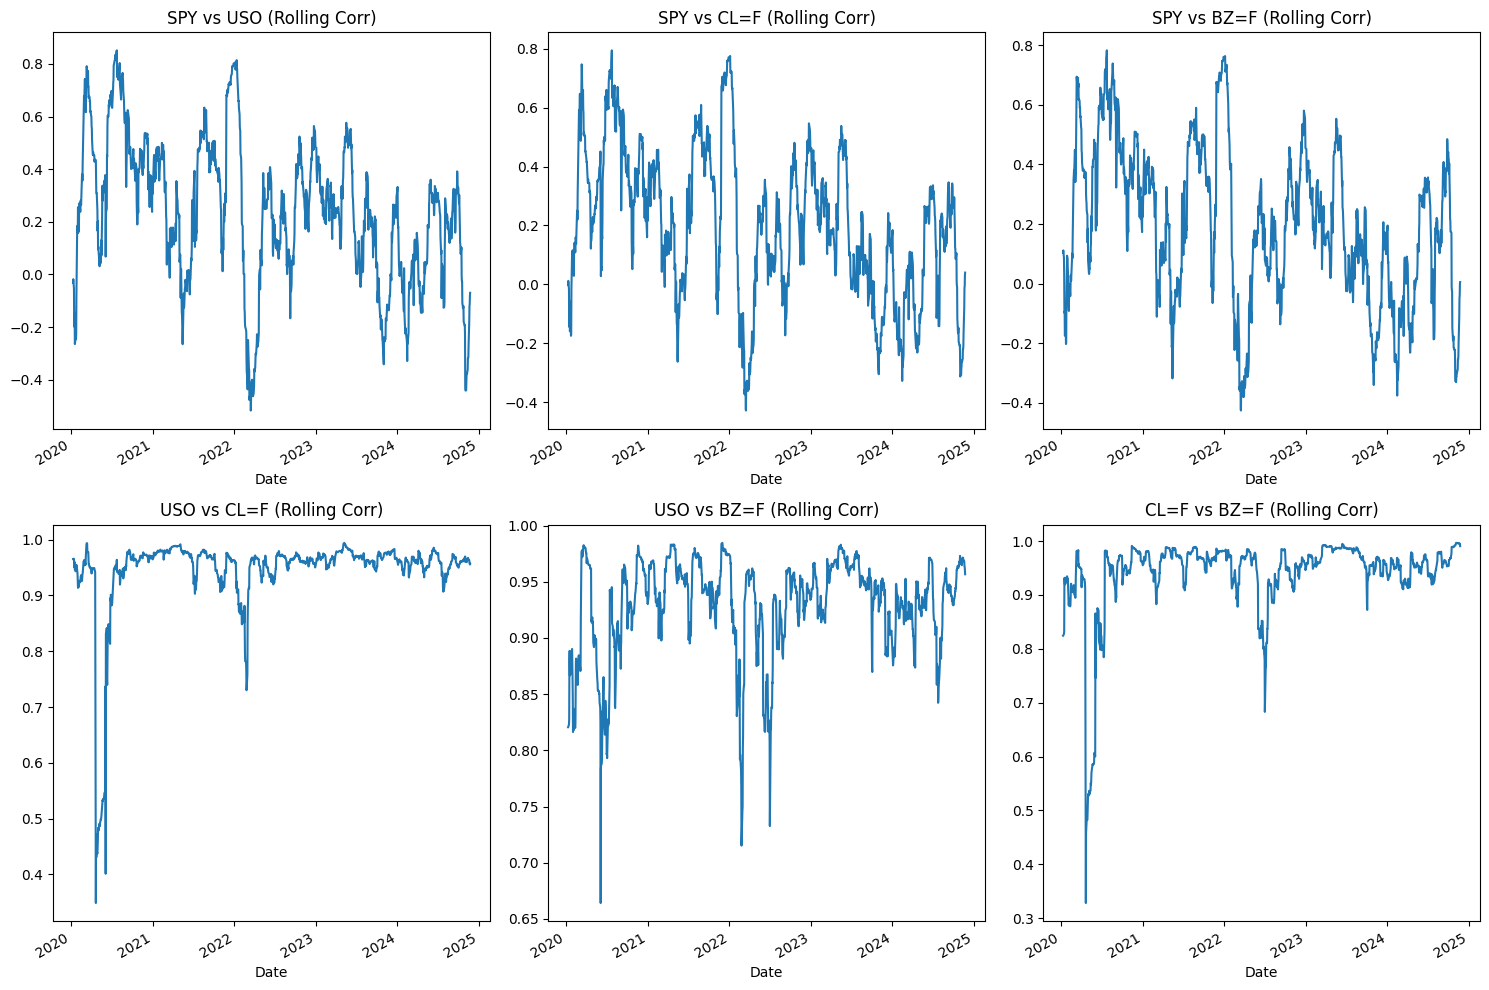

Simulated Volume of Trade: 8013000000


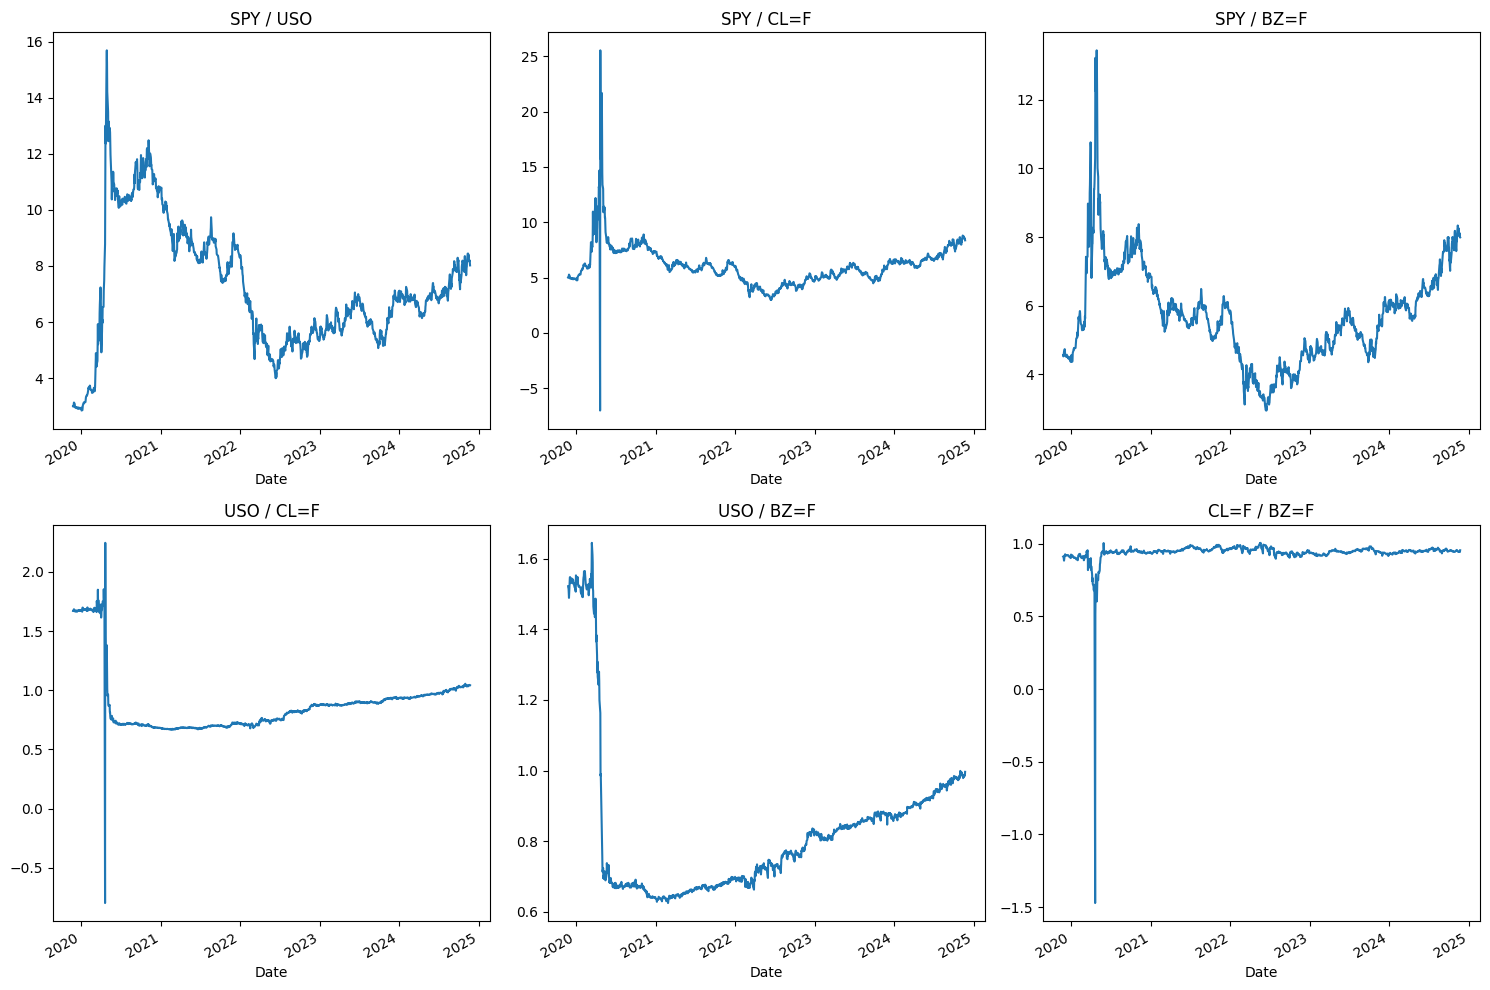

In [3]:
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed

# Create a folder for today's date
today = datetime.today().strftime('%Y-%m-%d')
data_folder = f"data/{today}"
output_folder = f"output/{today}"
os.makedirs(data_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

# Function to download or load cached data
def get_data(ticker):
    file_path = f"{data_folder}/{ticker}.csv"
    
    # Check if file already exists
    if os.path.exists(file_path):
        print(f"Loading {ticker} data from {file_path}")
        try:
            return pd.read_csv(file_path, index_col=0, parse_dates=True)
        except Exception as e:
            print(f"Error loading cached file for {ticker}: {e}")
            return None
    else:
        print(f"Downloading {ticker} data and saving to {file_path}")
        try:
            df = yf.download(ticker, period='5y')
            if not df.empty:
                df.to_csv(file_path)
                return df
            else:
                print(f"Downloaded data for {ticker} is empty, skipping.")
                return None
        except Exception as e:
            print(f"Error downloading {ticker}: {e}")
            return None

# List of ETFs and Commodities
assets = ['SPY', 'USO']
'''
    'GC=F', 'TLT', 'XLU', 'XLK', 'XLY', 'DBC', 'EEM', 'ZROZ', 
    'IEF', 'XLP', 'XLRE', 'PDBC', 'GSG', 'DBA', 'JJM', 'COPX', 'TIP', 'UUP', 
    'ITB', 'EFA', 'VWO', 'XLC', 'XLV', 'XLF', 'XLI', 'XLB', 'XLE', 'XLRE', 
    'XLP', 'XLY', 'XLK', 'XLU', 'FXE', 'FXY', 'FXB', 'FXC', 'FXA', 'FXF', 'CNY'
]
'''

commodities = [
    'CL=F', 'BZ=F']
'''
    'NG=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'HG=F', 
    'PL=F', 'PA=F', 'ALI=F', 'ZC=F', 'ZW=F', 'ZS=F', 'KC=F', 'SB=F', 
    'CT=F', 'CC=F', 'LB=F', 'LE=F', 'HE=F', 'GF=F'
]
'''
'''
# List of ETFs and Commodities
assets = [
    'SPY', 'USO', 'GC=F', 'TLT', 'XLU', 'XLK', 'XLY', 'DBC', 'EEM', 'ZROZ', 
    'IEF', 'XLP', 'XLRE', 'PDBC', 'GSG', 'DBA', 'JJM', 'COPX', 'TIP', 'UUP', 
    'ITB', 'EFA', 'VWO', 'XLC', 'XLV', 'XLF', 'XLI', 'XLB', 'XLE', 'XLRE', 
    'XLP', 'XLY', 'XLK', 'XLU', 'FXE', 'FXY', 'FXB', 'FXC', 'FXA', 'FXF', 'CNY'
]

commodities = [
    'CL=F', 'BZ=F', 'NG=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'HG=F', 
    'PL=F', 'PA=F', 'ALI=F', 'ZC=F', 'ZW=F', 'ZS=F', 'KC=F', 'SB=F', 
    'CT=F', 'CC=F', 'LB=F', 'LE=F', 'HE=F', 'GF=F'
]

all_assets = [ "ALI=F", "BZ=F", "CC=F", "CL=F", "CNY", "COPX", "CT=F", "DBA", "DBB", "DBC", "EEM", "EFA", "FXA", "FXB",
"FXC", "FXE", "FXF", "FXY", "GC=F", "GF=F", "GSG", "HE=F", "HG=F", "HO=F", "IEF", "IEI", "ITB", "IWM", "JJM", "KC=F", 
"LB=F", "LE=F", "NG=F", "PA=F", "PDBC", "PL=F", "RB=F", "SB=F", "SHY", "SI=F", "SPY", "TIP", "TLT", "USO", "UUP", "VWO",
"XLB", "XLC", "XLE", "XLF", "XLI", "XLK", "XLP", "XLRE", "XLU", "XLV", "XLY", "ZC=F", "ZROZ", "ZS=F", "ZW=F" ]

'''


# Combine assets and commodities
all_assets = assets + commodities

# Function to download or load data for all assets in parallel
def download_data_parallel(assets):
    df_dict = {}
    failed_tickers = []
    with ThreadPoolExecutor(max_workers=32) as executor:
        future_to_ticker = {executor.submit(get_data, asset): asset for asset in assets}
        for future in as_completed(future_to_ticker):
            asset = future_to_ticker[future]
            try:
                df = future.result()
                if df is not None and 'Adj Close' in df.columns:
                    df_dict[asset] = df['Adj Close']
                else:
                    print(f"Data for {asset} is invalid or missing 'Adj Close', skipping.")
                    failed_tickers.append(asset)
            except Exception as e:
                print(f"Error processing {asset}: {e}")
                failed_tickers.append(asset)
    if failed_tickers:
        print(f"Failed to download data for: {', '.join(failed_tickers)}")
    return df_dict

df_dict = download_data_parallel(all_assets)

# Ensure we have valid data before continuing
if len(df_dict) == 0:
    print("No valid data was downloaded, exiting...")
else:
    # Calculate percentage change for all assets
    pct_change_dict = {}
    for asset, df in df_dict.items():
        if not df.empty:
            pct_change = df.pct_change().dropna()
            if not pct_change.empty:
                pct_change_dict[asset] = pct_change

    # Convert to DataFrame for easier handling
    combined_pct_change_df = pd.DataFrame(pct_change_dict).dropna()

    # Check if the combined DataFrame is still valid
    if combined_pct_change_df.empty:
        print("No valid percentage change data, exiting...")
    else:
        # === Original Plots === #

        # 1. Pair Plot with KDE for all percentage changes across assets
        g = sns.pairplot(combined_pct_change_df, diag_kind='kde')
        g.fig.suptitle('Pair Plot of Percentage Changes Across All Assets', y=1.02)
        plt.show()
        # Save the pair plot
        g.fig.savefig(f"{output_folder}/pair_plot_percentage_changes.png")

        # 2. Correlation Heatmap for all assets with better label formatting
        def plot_correlation_heatmap(combined_pct_change_df):
            corr_matrix = combined_pct_change_df.corr()

            plt.figure(figsize=(16, 12))
            sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
                        annot_kws={"size": 8}, fmt='.2f', cbar_kws={"shrink": 0.8})
            plt.xticks(rotation=45, ha="right", fontsize=8)
            plt.yticks(fontsize=8)
            plt.title('Correlation Heatmap of Percentage Changes Across All Assets')
            
            # Save the correlation heatmap before showing it
            plt.savefig(f"{output_folder}/correlation_heatmap.png")
            plt.show()

        plot_correlation_heatmap(combined_pct_change_df)

        # 3. Joint Plot Grid for kernel density and scatter
        def plot_joint_kde_grid(combined_pct_change_df, assets, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            num_rows = (num_plots // num_cols) + 1

            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
            axes = axes.flatten()

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        sns.kdeplot(x=combined_pct_change_df[asset1], y=combined_pct_change_df[asset2],
                                    cmap="RdBu_r", ax=axes[plot_idx], fill=True)
                        axes[plot_idx].set_title(f'{asset1} vs {asset2}')
                        plot_idx += 1

                        if plot_idx >= len(axes):
                            break
                if plot_idx >= len(axes):
                    break

            plt.tight_layout()
            plt.show()

        plot_joint_kde_grid(combined_pct_change_df, all_assets)

        # === Additional Grids (Displayed and Saved) === #

        # Helper function to create grid layouts with manageable number of subplots
        def create_grid(num_plots, num_cols=3):
            num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
            axes = axes.flatten()
            return fig, axes

        # 1. Time Series Overlay for each pair of assets (in a grid, displayed and saved as PNG)
        def plot_time_series_grid(combined_pct_change_df, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        axes[plot_idx].plot(combined_pct_change_df.index, combined_pct_change_df[asset1], label=f'{asset1}', color='blue')
                        axes[plot_idx].plot(combined_pct_change_df.index, combined_pct_change_df[asset2], label=f'{asset2}', color='orange')
                        axes[plot_idx].set_title(f'{asset1} vs {asset2}')
                        axes[plot_idx].legend()
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_time_series_grid(combined_pct_change_df, all_assets, "time_series_grid")

        # 2. Ratio Analysis (showing each asset relative to others, in a grid, displayed and saved as PNG)
        def plot_ratio_grid(df_dict, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in df_dict and asset2 in df_dict:
                        ratio = df_dict[asset1] / df_dict[asset2]
                        ratio.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1}/{asset2}')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_ratio_grid(df_dict, all_assets, "ratio_grid")

        # 3. Rolling Correlation Plot for each pair of assets (in a grid, displayed and saved as PNG)
        def plot_rolling_corr_grid(combined_pct_change_df, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in combined_pct_change_df.columns and asset2 in combined_pct_change_df.columns:
                        rolling_corr = combined_pct_change_df[asset1].rolling(window=30).corr(combined_pct_change_df[asset2])
                        rolling_corr.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1} vs {asset2} (Rolling Corr)')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_rolling_corr_grid(combined_pct_change_df, all_assets, "rolling_corr_grid")

        # 4. Simulated Volume of Trade (Static value)
        volume_of_trade = 1000000 * len(df_dict.get('SPY', []))
        print(f"Simulated Volume of Trade: {volume_of_trade}")

        # 5. Ratio Comparisons (e.g., SPY / USO) Plots in Grids
        def plot_ratio_comparisons_grid(df_dict, assets, filename, num_cols=3):
            num_plots = len(assets) * (len(assets) - 1) // 2
            fig, axes = create_grid(num_plots, num_cols)

            plot_idx = 0
            for i, asset1 in enumerate(assets):
                for asset2 in assets[i+1:]:
                    if asset1 in df_dict and asset2 in df_dict:
                        ratio = df_dict[asset1] / df_dict[asset2]
                        ratio.plot(ax=axes[plot_idx])
                        axes[plot_idx].set_title(f'{asset1} / {asset2}')
                        plot_idx += 1
                        if plot_idx >= len(axes):
                            break

            plt.tight_layout()
            plt.show()
            fig.savefig(f"{output_folder}/{filename}.png")
            plt.close(fig)

        plot_ratio_comparisons_grid(df_dict, all_assets, "ratio_comparisons_grid")